# Epochs and bands

In [2]:
files = ["/mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif"]

In [5]:
healthy = ["/mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif"]

In [2]:
schizo = ["/mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif",
         "/mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif"]

In [3]:
import numpy as np
from mne.io import read_raw_fif
from mne import Epochs
from mne import make_fixed_length_epochs
from mne.time_frequency import psd_welch, psd_multitaper
from mne.viz import plot_topomap


In [133]:
sh_ave = np.zeros((14,19))
for n_file, file in enumerate(schizo):
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    #epochs.plot_psd_topomap(ch_type="eeg", normalize=True);
    info = epochs.info
    #psd, freqs = psd_welch(epochs, fmin=1.0, fmax=45.0)
    psd, freqs = psd_multitaper(epochs, fmin=1.0, fmax=45.0, n_jobs=1)
    psd /= psd.sum(axis=-1, keepdims=True)
    s_ave = psd[:,:,(freqs>30.0) & (freqs<45.0)].mean(axis=2).mean(axis=0)
    sh_ave[n_file,:] = s_ave
   
    

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03

In [134]:
h_ave = np.zeros((14,19))
for n_file, file in enumerate(healthy):
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    #epochs.plot_psd_topomap(ch_type="eeg", normalize=True);
    info = epochs.info
    #psd, freqs = psd_welch(epochs, fmin=1.0, fmax=45.0)
    psd, freqs = psd_multitaper(epochs, fmin=1.0, fmax=45.0, n_jobs=1)
    psd /= psd.sum(axis=-1, keepdims=True)
    s_ave = psd[:,:,(freqs>30.0) & (freqs<45.0)].mean(axis=2).mean(axis=0)
    h_ave[n_file,:] = s_ave

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03

In [8]:
epochs.ch_names

['Fp2',
 'F8',
 'T4',
 'T6',
 'O2',
 'Fp1',
 'F7',
 'T3',
 'T5',
 'O1',
 'F4',
 'C4',
 'P4',
 'F3',
 'C3',
 'P3',
 'Fz',
 'Cz',
 'Pz']

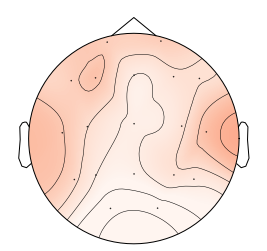

(<matplotlib.image.AxesImage at 0x7fb04d236a90>,
 <matplotlib.contour.QuadContourSet at 0x7fb04d236d90>)

In [137]:
plot_topomap(h_ave.mean(axis=0), info, vmin=0.001, vmax=0.005)

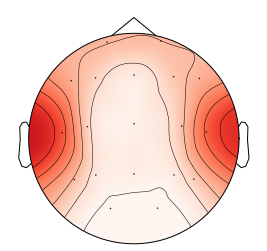

(<matplotlib.image.AxesImage at 0x7fb04d25f550>,
 <matplotlib.contour.QuadContourSet at 0x7fb04d25f850>)

In [138]:
plot_topomap(sh_ave.mean(axis=0), info, vmin=0.001, vmax=0.005)

In [82]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
delta_healthy = pd.DataFrame({"F8":h_ave[:,1],"F7":h_ave[:,6],"Cz":h_ave[:,17]})
delta_healthy["group"] = np.repeat("healthy",14)
delta_schizo = pd.DataFrame({"F8":sh_ave[:,1],"F7":sh_ave[:,6],"Cz":sh_ave[:,17]})
delta_schizo["group"] = np.repeat("schizo",14)

In [80]:
theta_healthy = pd.DataFrame({"Fz":h_ave[:,16],"Cz":h_ave[:,17]})
theta_healthy["group"] = np.repeat("healthy",14)
theta_schizo = pd.DataFrame({"Fz":sh_ave[:,16],"Cz":sh_ave[:,17]})
theta_schizo["group"] = np.repeat("schizo",14)

In [108]:
alpha_healthy = pd.DataFrame({"C4":h_ave[:,11],"P4":h_ave[:,12],"F3":h_ave[:,13],"C3":h_ave[:,14],"P3":h_ave[:,15],"Fz":h_ave[:,16],"Cz":h_ave[:,17],"Pz":h_ave[:,18]})
alpha_healthy["group"] = np.repeat("healthy",14)
alpha_schizo = pd.DataFrame({"C4":sh_ave[:,11],"P4":sh_ave[:,12],"F3":sh_ave[:,13],"C3":sh_ave[:,14],"P3":sh_ave[:,15],"Fz":sh_ave[:,16],"Cz":sh_ave[:,17],"Pz":sh_ave[:,18]})
alpha_schizo["group"] = np.repeat("schizo",14)

In [126]:
beta_healthy = pd.DataFrame({"T5":h_ave[:,8]})
beta_healthy["group"] = np.repeat("healthy",14)
beta_schizo = pd.DataFrame({"T5":sh_ave[:,8]})
beta_schizo["group"] = np.repeat("schizo",14)

In [139]:
gamma_healthy = pd.DataFrame({"T4":h_ave[:,2],"T3":h_ave[:,7]})
gamma_healthy["group"] = np.repeat("healthy",14)
gamma_schizo = pd.DataFrame({"T4":sh_ave[:,2],"T3":sh_ave[:,7]})
gamma_schizo["group"] = np.repeat("schizo",14)

In [ ]:
{"Fp2":h_ave[:,0],"F8":h_ave[:,1],"O2":h_ave[:,4],"Fp1":h_ave[:,5],"F7":h_ave[:,6],"O1":h_ave[:,9],"F4":h_ave[:,10],"C4":h_ave[:,11],"P4":h_ave[:,12],"F3":h_ave[:,13],"C3":h_ave[:,14],"P3":h_ave[:,15],"Fz":h_ave[:,16],"Cz":h_ave[:,17],"Pz":h_ave[:,18]})

In [41]:
delta_schizo = delta_schizo.append(delta_healthy)
delta_schizo = delta_schizo.reset_index()
delta_schizo = pd.melt(delta_schizo,id_vars=["index","group"],value_vars=["F8","F7","Cz"])


delta_schizo.head(30)

,index,group,variable,value
0,0,schizo,F8,0.049910
1,1,schizo,F8,0.045294
2,2,schizo,F8,0.022651
3,3,schizo,F8,0.045540
4,4,schizo,F8,0.021276
5,5,schizo,F8,0.072269
6,6,schizo,F8,0.064920
7,7,schizo,F8,0.031726
8,8,schizo,F8,0.044151
9,9,schizo,F8,0.052244


In [84]:
theta_schizo = theta_schizo.append(theta_healthy)
theta_schizo = theta_schizo.reset_index()
theta_schizo = pd.melt(theta_schizo,id_vars=["index","group"],value_vars=["Fz","Cz"])


In [109]:
alpha_schizo = alpha_schizo.append(alpha_healthy)
alpha_schizo = alpha_schizo.reset_index()
alpha_schizo = pd.melt(alpha_schizo,id_vars=["index","group"],value_vars=["C4","P4","F3","C3","P3","Fz","Cz","Pz"])

In [ ]:
"Fp2","F8","O2","Fp1","F7","O1","F4","C4","P4","F3","C3","P3","Fz","Cz","Pz"

In [128]:
beta_schizo = beta_schizo.append(beta_healthy)
beta_schizo = beta_schizo.reset_index()
beta_schizo = pd.melt(beta_schizo,id_vars=["index","group"],value_vars=["T5"])

In [140]:
gamma_schizo = gamma_schizo.append(gamma_healthy)
gamma_schizo = gamma_schizo.reset_index()
gamma_schizo = pd.melt(gamma_schizo,id_vars=["index","group"],value_vars=["T4","T3"])

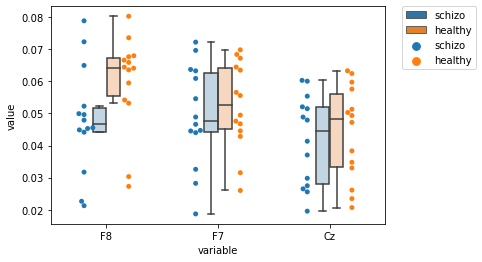

In [53]:
ax = seaborn.boxplot(x="variable",y="value",data=delta_schizo,hue="group",dodge=True,width=0.25,showfliers=False)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = seaborn.swarmplot(x="variable",y="value",data=delta_schizo,hue="group",dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

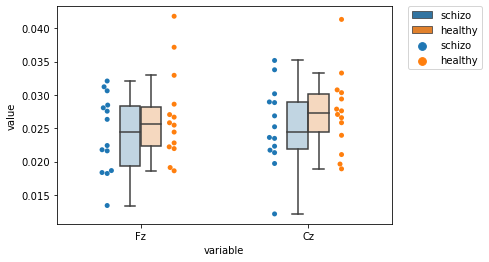

In [85]:
ax = seaborn.boxplot(x="variable",y="value",data=theta_schizo,hue="group",dodge=True,width=0.25,showfliers=False)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = seaborn.swarmplot(x="variable",y="value",data=theta_schizo,hue="group",dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/amstrinzel/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/amstrinzel/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


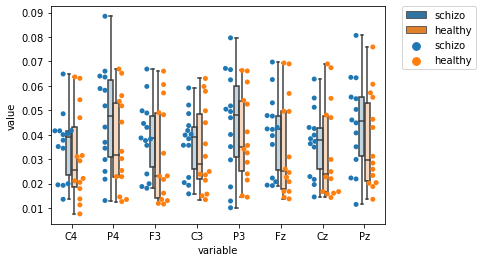

In [110]:
ax = seaborn.boxplot(x="variable",y="value",data=alpha_schizo,hue="group",dodge=True,width=0.25,showfliers=False)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = seaborn.swarmplot(x="variable",y="value",data=alpha_schizo,hue="group",dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

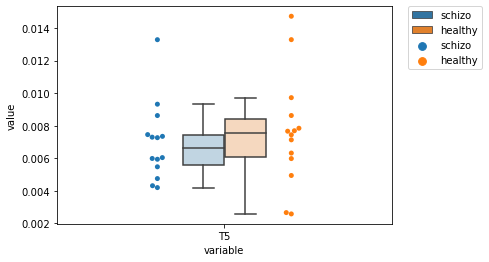

In [129]:
ax = seaborn.boxplot(x="variable",y="value",data=beta_schizo,hue="group",dodge=True,width=0.25,showfliers=False)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = seaborn.swarmplot(x="variable",y="value",data=beta_schizo,hue="group",dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

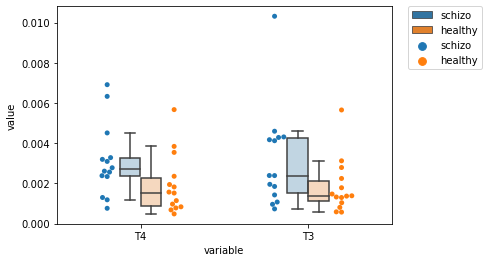

In [141]:
ax = seaborn.boxplot(x="variable",y="value",data=gamma_schizo,hue="group",dodge=True,width=0.25,showfliers=False)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax = seaborn.swarmplot(x="variable",y="value",data=gamma_schizo,hue="group",dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [54]:
from scipy import stats

In [59]:
h_F8 = delta_schizo.loc[(delta_schizo['variable'] == "F8") & (delta_schizo['group'] == "healthy")]
s_F8 = delta_schizo.loc[(delta_schizo['variable'] == "F8") & (delta_schizo['group'] == "schizo")]

In [67]:
stats.ttest_ind(h_F8["value"], s_F8["value"], equal_var=False)

Ttest_indResult(statistic=2.014769507827961, pvalue=0.05448583575057455)

In [86]:
h_Cz = theta_schizo.loc[(theta_schizo['variable'] == "Cz") & (theta_schizo['group'] == "healthy")]
s_Cz = theta_schizo.loc[(theta_schizo['variable'] == "Cz") & (theta_schizo['group'] == "schizo")]

In [87]:
stats.ttest_ind(h_Cz["value"], s_Cz["value"], equal_var=False)

Ttest_indResult(statistic=0.9678150389704233, pvalue=0.342062534997258)

In [111]:
h_Pz = alpha_schizo.loc[(alpha_schizo['variable'] == "Pz") & (alpha_schizo['group'] == "healthy")]
s_Pz = alpha_schizo.loc[(alpha_schizo['variable'] == "Pz") & (alpha_schizo['group'] == "schizo")]

In [112]:
stats.ttest_ind(h_Pz["value"], s_Pz["value"], equal_var=False)

Ttest_indResult(statistic=-0.9903178215794465, pvalue=0.33114734174667837)

In [131]:
h_T5 = beta_schizo.loc[(beta_schizo['variable'] == "T5") & (beta_schizo['group'] == "healthy")]
s_T5 = beta_schizo.loc[(beta_schizo['variable'] == "T5") & (beta_schizo['group'] == "schizo")]

In [132]:
stats.ttest_ind(h_T5["value"], s_T5["value"], equal_var=False)

Ttest_indResult(statistic=0.6010039892023995, pvalue=0.5536453239922046)

In [144]:
h_T3 = gamma_schizo.loc[(gamma_schizo['variable'] == "T3") & (gamma_schizo['group'] == "healthy")]
s_T3 = gamma_schizo.loc[(gamma_schizo['variable'] == "T3") & (gamma_schizo['group'] == "schizo")]

In [145]:
stats.ttest_ind(h_T3["value"], s_T3["value"], equal_var=False)

Ttest_indResult(statistic=-1.81202761730623, pvalue=0.08505950808332291)

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


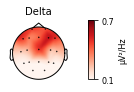

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


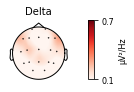

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


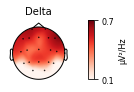

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


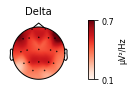

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif...
    Range : 0 ... 236249 =      0.000 ...   944.996 secs
Ready.
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
Not setting metadata
Not setting metadata
472 matching events found
No baseline correction applied
0 projection items activated
Loading data for 472 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


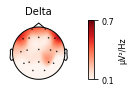

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif...
    Range : 0 ... 232499 =      0.000 ...   929.996 secs
Ready.
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Loading data for 465 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


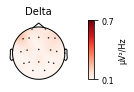

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


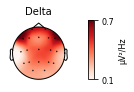

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


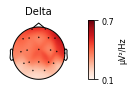

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif...
    Range : 0 ... 226249 =      0.000 ...   904.996 secs
Ready.
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
Not setting metadata
Not setting metadata
452 matching events found
No baseline correction applied
0 projection items activated
Loading data for 452 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


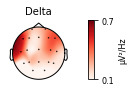

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif...
    Range : 0 ... 278749 =      0.000 ...  1114.996 secs
Ready.
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
Not setting metadata
Not setting metadata
557 matching events found
No baseline correction applied
0 projection items activated
Loading data for 557 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


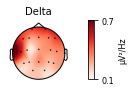

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif...
    Range : 0 ... 228749 =      0.000 ...   914.996 secs
Ready.
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
Not setting metadata
Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Loading data for 457 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


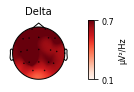

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif...
    Range : 0 ... 224999 =      0.000 ...   899.996 secs
Ready.
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
Not setting metadata
Not setting metadata
450 matching events found
No baseline correction applied
0 projection items activated
Loading data for 450 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


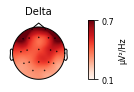

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif...
    Range : 0 ... 241249 =      0.000 ...   964.996 secs
Ready.
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


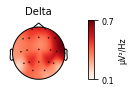

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif...
    Range : 0 ... 216249 =      0.000 ...   864.996 secs
Ready.
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
Not setting metadata
Not setting metadata
432 matching events found
No baseline correction applied
0 projection items activated
Loading data for 432 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


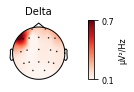

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


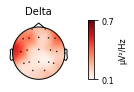

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


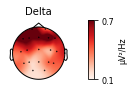

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif...
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


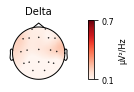

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif...
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Not setting metadata
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Loading data for 602 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


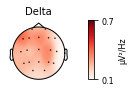

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif...
    Range : 0 ... 222499 =      0.000 ...   889.996 secs
Ready.
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
Not setting metadata
Not setting metadata
445 matching events found
No baseline correction applied
0 projection items activated
Loading data for 445 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


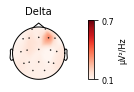

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif...
    Range : 0 ... 184999 =      0.000 ...   739.996 secs
Ready.
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
Not setting metadata
Not setting metadata
370 matching events found
No baseline correction applied
0 projection items activated
Loading data for 370 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


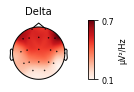

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif...
    Range : 0 ... 336499 =      0.000 ...  1345.996 secs
Ready.
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
Not setting metadata
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Loading data for 673 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


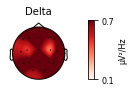

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif...
    Range : 0 ... 227749 =      0.000 ...   910.996 secs
Ready.
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


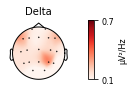

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif...
    Range : 0 ... 296249 =      0.000 ...  1184.996 secs
Ready.
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
Not setting metadata
Not setting metadata
592 matching events found
No baseline correction applied
0 projection items activated
Loading data for 592 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


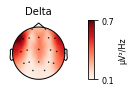

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif...
    Range : 0 ... 212499 =      0.000 ...   849.996 secs
Ready.
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
Not setting metadata
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Loading data for 425 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


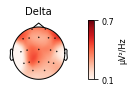

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif...
    Range : 0 ... 339999 =      0.000 ...  1359.996 secs
Ready.
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
Not setting metadata
Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Loading data for 680 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


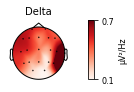

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif...
    Range : 0 ... 271749 =      0.000 ...  1086.996 secs
Ready.
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
Not setting metadata
Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Loading data for 543 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


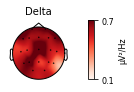

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif...
    Range : 0 ... 283749 =      0.000 ...  1134.996 secs
Ready.
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
Not setting metadata
Not setting metadata
567 matching events found
No baseline correction applied
0 projection items activated
Loading data for 567 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


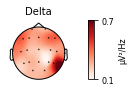

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif...
    Range : 0 ... 542499 =      0.000 ...  2169.996 secs
Ready.
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
Not setting metadata
Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1085 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


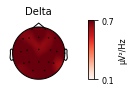

In [44]:
from mne.io import read_raw_fif
from mne import Epochs
from mne import make_fixed_length_epochs


for file in files:
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    epochs.plot_psd_topomap(bands=[(0,4, "Delta")], ch_type="eeg", normalize=True, dB=True, vlim=(0.1, 0.7));

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


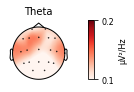

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


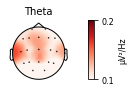

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


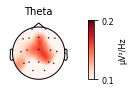

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


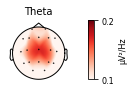

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif...
    Range : 0 ... 236249 =      0.000 ...   944.996 secs
Ready.
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
Not setting metadata
Not setting metadata
472 matching events found
No baseline correction applied
0 projection items activated
Loading data for 472 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


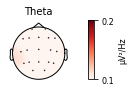

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif...
    Range : 0 ... 232499 =      0.000 ...   929.996 secs
Ready.
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Loading data for 465 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


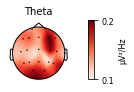

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


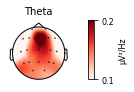

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


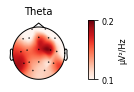

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif...
    Range : 0 ... 226249 =      0.000 ...   904.996 secs
Ready.
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
Not setting metadata
Not setting metadata
452 matching events found
No baseline correction applied
0 projection items activated
Loading data for 452 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


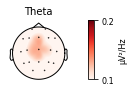

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif...
    Range : 0 ... 278749 =      0.000 ...  1114.996 secs
Ready.
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
Not setting metadata
Not setting metadata
557 matching events found
No baseline correction applied
0 projection items activated
Loading data for 557 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


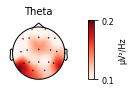

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif...
    Range : 0 ... 228749 =      0.000 ...   914.996 secs
Ready.
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
Not setting metadata
Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Loading data for 457 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


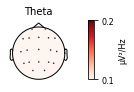

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif...
    Range : 0 ... 224999 =      0.000 ...   899.996 secs
Ready.
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
Not setting metadata
Not setting metadata
450 matching events found
No baseline correction applied
0 projection items activated
Loading data for 450 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


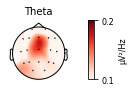

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif...
    Range : 0 ... 241249 =      0.000 ...   964.996 secs
Ready.
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


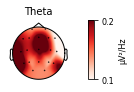

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif...
    Range : 0 ... 216249 =      0.000 ...   864.996 secs
Ready.
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
Not setting metadata
Not setting metadata
432 matching events found
No baseline correction applied
0 projection items activated
Loading data for 432 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


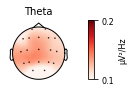

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


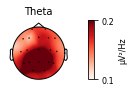

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


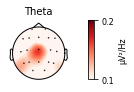

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif...
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


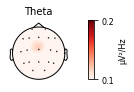

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif...
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Not setting metadata
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Loading data for 602 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


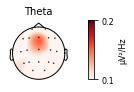

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif...
    Range : 0 ... 222499 =      0.000 ...   889.996 secs
Ready.
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
Not setting metadata
Not setting metadata
445 matching events found
No baseline correction applied
0 projection items activated
Loading data for 445 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


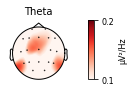

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif...
    Range : 0 ... 184999 =      0.000 ...   739.996 secs
Ready.
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
Not setting metadata
Not setting metadata
370 matching events found
No baseline correction applied
0 projection items activated
Loading data for 370 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


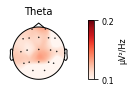

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif...
    Range : 0 ... 336499 =      0.000 ...  1345.996 secs
Ready.
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
Not setting metadata
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Loading data for 673 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


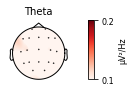

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif...
    Range : 0 ... 227749 =      0.000 ...   910.996 secs
Ready.
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


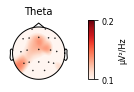

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif...
    Range : 0 ... 296249 =      0.000 ...  1184.996 secs
Ready.
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
Not setting metadata
Not setting metadata
592 matching events found
No baseline correction applied
0 projection items activated
Loading data for 592 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


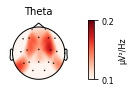

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif...
    Range : 0 ... 212499 =      0.000 ...   849.996 secs
Ready.
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
Not setting metadata
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Loading data for 425 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


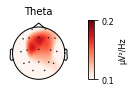

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif...
    Range : 0 ... 339999 =      0.000 ...  1359.996 secs
Ready.
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
Not setting metadata
Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Loading data for 680 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


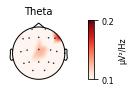

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif...
    Range : 0 ... 271749 =      0.000 ...  1086.996 secs
Ready.
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
Not setting metadata
Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Loading data for 543 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


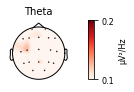

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif...
    Range : 0 ... 283749 =      0.000 ...  1134.996 secs
Ready.
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
Not setting metadata
Not setting metadata
567 matching events found
No baseline correction applied
0 projection items activated
Loading data for 567 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


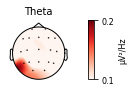

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif...
    Range : 0 ... 542499 =      0.000 ...  2169.996 secs
Ready.
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
Not setting metadata
Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1085 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


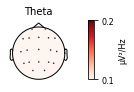

In [46]:
for file in files:
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    epochs.plot_psd_topomap(bands=[(4,8, "Theta")], ch_type="eeg", normalize=True, dB=True, vlim=(0.1, 0.2));

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


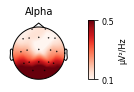

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


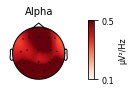

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


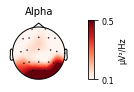

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


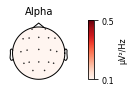

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif...
    Range : 0 ... 236249 =      0.000 ...   944.996 secs
Ready.
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
Not setting metadata
Not setting metadata
472 matching events found
No baseline correction applied
0 projection items activated
Loading data for 472 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


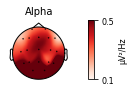

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif...
    Range : 0 ... 232499 =      0.000 ...   929.996 secs
Ready.
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Loading data for 465 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


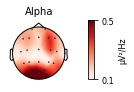

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


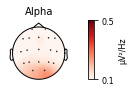

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


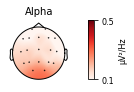

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif...
    Range : 0 ... 226249 =      0.000 ...   904.996 secs
Ready.
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
Not setting metadata
Not setting metadata
452 matching events found
No baseline correction applied
0 projection items activated
Loading data for 452 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


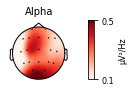

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif...
    Range : 0 ... 278749 =      0.000 ...  1114.996 secs
Ready.
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
Not setting metadata
Not setting metadata
557 matching events found
No baseline correction applied
0 projection items activated
Loading data for 557 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


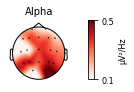

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif...
    Range : 0 ... 228749 =      0.000 ...   914.996 secs
Ready.
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
Not setting metadata
Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Loading data for 457 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


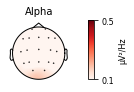

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif...
    Range : 0 ... 224999 =      0.000 ...   899.996 secs
Ready.
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
Not setting metadata
Not setting metadata
450 matching events found
No baseline correction applied
0 projection items activated
Loading data for 450 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


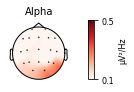

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif...
    Range : 0 ... 241249 =      0.000 ...   964.996 secs
Ready.
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


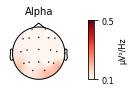

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif...
    Range : 0 ... 216249 =      0.000 ...   864.996 secs
Ready.
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
Not setting metadata
Not setting metadata
432 matching events found
No baseline correction applied
0 projection items activated
Loading data for 432 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


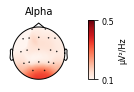

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


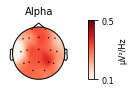

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


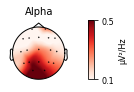

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif...
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


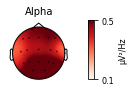

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif...
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Not setting metadata
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Loading data for 602 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


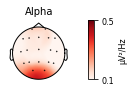

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif...
    Range : 0 ... 222499 =      0.000 ...   889.996 secs
Ready.
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
Not setting metadata
Not setting metadata
445 matching events found
No baseline correction applied
0 projection items activated
Loading data for 445 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


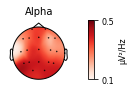

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif...
    Range : 0 ... 184999 =      0.000 ...   739.996 secs
Ready.
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
Not setting metadata
Not setting metadata
370 matching events found
No baseline correction applied
0 projection items activated
Loading data for 370 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


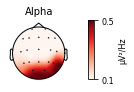

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif...
    Range : 0 ... 336499 =      0.000 ...  1345.996 secs
Ready.
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
Not setting metadata
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Loading data for 673 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


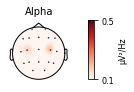

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif...
    Range : 0 ... 227749 =      0.000 ...   910.996 secs
Ready.
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


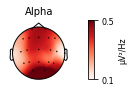

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif...
    Range : 0 ... 296249 =      0.000 ...  1184.996 secs
Ready.
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
Not setting metadata
Not setting metadata
592 matching events found
No baseline correction applied
0 projection items activated
Loading data for 592 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


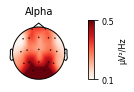

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif...
    Range : 0 ... 212499 =      0.000 ...   849.996 secs
Ready.
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
Not setting metadata
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Loading data for 425 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


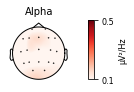

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif...
    Range : 0 ... 339999 =      0.000 ...  1359.996 secs
Ready.
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
Not setting metadata
Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Loading data for 680 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


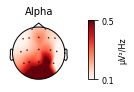

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif...
    Range : 0 ... 271749 =      0.000 ...  1086.996 secs
Ready.
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
Not setting metadata
Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Loading data for 543 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


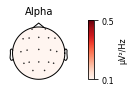

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif...
    Range : 0 ... 283749 =      0.000 ...  1134.996 secs
Ready.
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
Not setting metadata
Not setting metadata
567 matching events found
No baseline correction applied
0 projection items activated
Loading data for 567 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


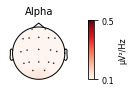

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif...
    Range : 0 ... 542499 =      0.000 ...  2169.996 secs
Ready.
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
Not setting metadata
Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1085 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


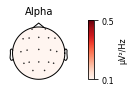

In [48]:
for file in files:
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    epochs.plot_psd_topomap(bands=[(8,12, "Alpha")], ch_type="eeg", normalize=True, dB=True, vlim=(0.1, 0.5));

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


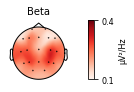

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


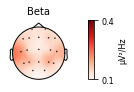

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


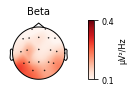

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


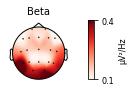

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif...
    Range : 0 ... 236249 =      0.000 ...   944.996 secs
Ready.
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
Not setting metadata
Not setting metadata
472 matching events found
No baseline correction applied
0 projection items activated
Loading data for 472 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


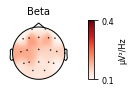

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif...
    Range : 0 ... 232499 =      0.000 ...   929.996 secs
Ready.
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Loading data for 465 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


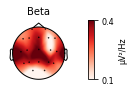

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


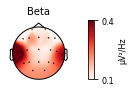

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


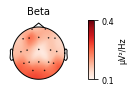

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif...
    Range : 0 ... 226249 =      0.000 ...   904.996 secs
Ready.
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
Not setting metadata
Not setting metadata
452 matching events found
No baseline correction applied
0 projection items activated
Loading data for 452 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


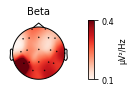

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif...
    Range : 0 ... 278749 =      0.000 ...  1114.996 secs
Ready.
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
Not setting metadata
Not setting metadata
557 matching events found
No baseline correction applied
0 projection items activated
Loading data for 557 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


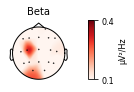

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif...
    Range : 0 ... 228749 =      0.000 ...   914.996 secs
Ready.
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
Not setting metadata
Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Loading data for 457 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


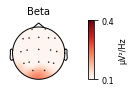

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif...
    Range : 0 ... 224999 =      0.000 ...   899.996 secs
Ready.
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
Not setting metadata
Not setting metadata
450 matching events found
No baseline correction applied
0 projection items activated
Loading data for 450 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


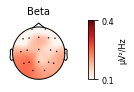

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif...
    Range : 0 ... 241249 =      0.000 ...   964.996 secs
Ready.
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


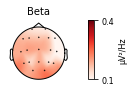

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif...
    Range : 0 ... 216249 =      0.000 ...   864.996 secs
Ready.
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
Not setting metadata
Not setting metadata
432 matching events found
No baseline correction applied
0 projection items activated
Loading data for 432 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


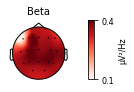

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


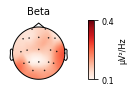

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


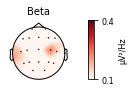

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif...
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


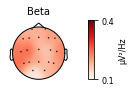

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif...
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Not setting metadata
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Loading data for 602 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


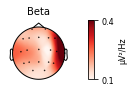

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif...
    Range : 0 ... 222499 =      0.000 ...   889.996 secs
Ready.
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
Not setting metadata
Not setting metadata
445 matching events found
No baseline correction applied
0 projection items activated
Loading data for 445 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


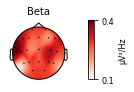

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif...
    Range : 0 ... 184999 =      0.000 ...   739.996 secs
Ready.
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
Not setting metadata
Not setting metadata
370 matching events found
No baseline correction applied
0 projection items activated
Loading data for 370 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


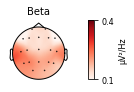

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif...
    Range : 0 ... 336499 =      0.000 ...  1345.996 secs
Ready.
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
Not setting metadata
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Loading data for 673 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


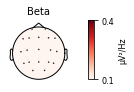

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif...
    Range : 0 ... 227749 =      0.000 ...   910.996 secs
Ready.
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


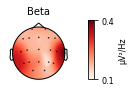

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif...
    Range : 0 ... 296249 =      0.000 ...  1184.996 secs
Ready.
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
Not setting metadata
Not setting metadata
592 matching events found
No baseline correction applied
0 projection items activated
Loading data for 592 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


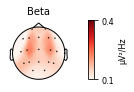

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif...
    Range : 0 ... 212499 =      0.000 ...   849.996 secs
Ready.
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
Not setting metadata
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Loading data for 425 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


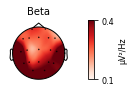

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif...
    Range : 0 ... 339999 =      0.000 ...  1359.996 secs
Ready.
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
Not setting metadata
Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Loading data for 680 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


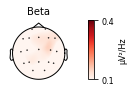

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif...
    Range : 0 ... 271749 =      0.000 ...  1086.996 secs
Ready.
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
Not setting metadata
Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Loading data for 543 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


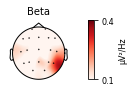

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif...
    Range : 0 ... 283749 =      0.000 ...  1134.996 secs
Ready.
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
Not setting metadata
Not setting metadata
567 matching events found
No baseline correction applied
0 projection items activated
Loading data for 567 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


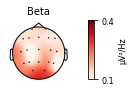

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif...
    Range : 0 ... 542499 =      0.000 ...  2169.996 secs
Ready.
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
Not setting metadata
Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1085 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


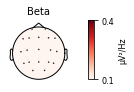

In [49]:
for file in files:
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    epochs.plot_psd_topomap(bands=[(12,30, "Beta")], ch_type="eeg", normalize=True, dB=True, vlim=(0.1, 0.4));

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h01-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


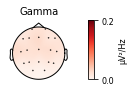

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h02-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


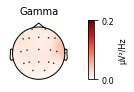

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h03-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


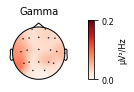

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h04-raw.fif...
    Range : 0 ... 231249 =      0.000 ...   924.996 secs
Ready.
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Not setting metadata
Not setting metadata
462 matching events found
No baseline correction applied
0 projection items activated
Loading data for 462 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


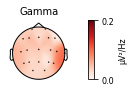

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h05-raw.fif...
    Range : 0 ... 236249 =      0.000 ...   944.996 secs
Ready.
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
Not setting metadata
Not setting metadata
472 matching events found
No baseline correction applied
0 projection items activated
Loading data for 472 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


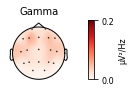

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h06-raw.fif...
    Range : 0 ... 232499 =      0.000 ...   929.996 secs
Ready.
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
Loading data for 465 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


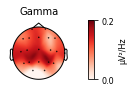

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h07-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


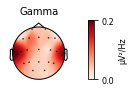

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h08-raw.fif...
    Range : 0 ... 227499 =      0.000 ...   909.996 secs
Ready.
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


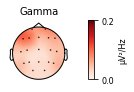

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h09-raw.fif...
    Range : 0 ... 226249 =      0.000 ...   904.996 secs
Ready.
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
Not setting metadata
Not setting metadata
452 matching events found
No baseline correction applied
0 projection items activated
Loading data for 452 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


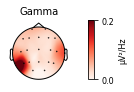

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h10-raw.fif...
    Range : 0 ... 278749 =      0.000 ...  1114.996 secs
Ready.
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
Not setting metadata
Not setting metadata
557 matching events found
No baseline correction applied
0 projection items activated
Loading data for 557 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


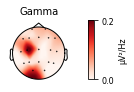

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h11-raw.fif...
    Range : 0 ... 228749 =      0.000 ...   914.996 secs
Ready.
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
Not setting metadata
Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Loading data for 457 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


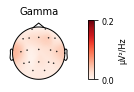

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h12-raw.fif...
    Range : 0 ... 224999 =      0.000 ...   899.996 secs
Ready.
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
Not setting metadata
Not setting metadata
450 matching events found
No baseline correction applied
0 projection items activated
Loading data for 450 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


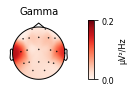

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h13-raw.fif...
    Range : 0 ... 241249 =      0.000 ...   964.996 secs
Ready.
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


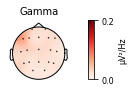

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/h14-raw.fif...
    Range : 0 ... 216249 =      0.000 ...   864.996 secs
Ready.
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
Not setting metadata
Not setting metadata
432 matching events found
No baseline correction applied
0 projection items activated
Loading data for 432 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


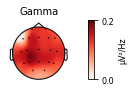

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s01-raw.fif...
    Range : 0 ... 211249 =      0.000 ...   844.996 secs
Ready.
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Not setting metadata
Not setting metadata
422 matching events found
No baseline correction applied
0 projection items activated
Loading data for 422 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


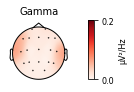

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s02-raw.fif...
    Range : 0 ... 286249 =      0.000 ...  1144.996 secs
Ready.
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Not setting metadata
Not setting metadata
572 matching events found
No baseline correction applied
0 projection items activated
Loading data for 572 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


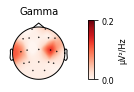

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s03-raw.fif...
    Range : 0 ... 240999 =      0.000 ...   963.996 secs
Ready.
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Not setting metadata
Not setting metadata
482 matching events found
No baseline correction applied
0 projection items activated
Loading data for 482 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


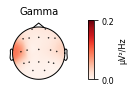

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s04-raw.fif...
    Range : 0 ... 301249 =      0.000 ...  1204.996 secs
Ready.
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Not setting metadata
Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Loading data for 602 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


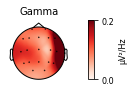

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s05-raw.fif...
    Range : 0 ... 222499 =      0.000 ...   889.996 secs
Ready.
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
Not setting metadata
Not setting metadata
445 matching events found
No baseline correction applied
0 projection items activated
Loading data for 445 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


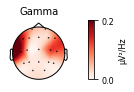

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s06-raw.fif...
    Range : 0 ... 184999 =      0.000 ...   739.996 secs
Ready.
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
Not setting metadata
Not setting metadata
370 matching events found
No baseline correction applied
0 projection items activated
Loading data for 370 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


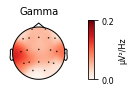

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s07-raw.fif...
    Range : 0 ... 336499 =      0.000 ...  1345.996 secs
Ready.
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
Not setting metadata
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Loading data for 673 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


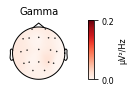

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s08-raw.fif...
    Range : 0 ... 227749 =      0.000 ...   910.996 secs
Ready.
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
Not setting metadata
Not setting metadata
455 matching events found
No baseline correction applied
0 projection items activated
Loading data for 455 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


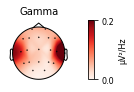

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s09-raw.fif...
    Range : 0 ... 296249 =      0.000 ...  1184.996 secs
Ready.
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
Not setting metadata
Not setting metadata
592 matching events found
No baseline correction applied
0 projection items activated
Loading data for 592 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


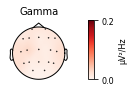

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s10-raw.fif...
    Range : 0 ... 212499 =      0.000 ...   849.996 secs
Ready.
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
Not setting metadata
Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Loading data for 425 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


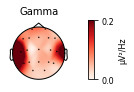

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s11-raw.fif...
    Range : 0 ... 339999 =      0.000 ...  1359.996 secs
Ready.
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
Not setting metadata
Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Loading data for 680 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


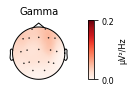

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s12-raw.fif...
    Range : 0 ... 271749 =      0.000 ...  1086.996 secs
Ready.
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
Not setting metadata
Not setting metadata
543 matching events found
No baseline correction applied
0 projection items activated
Loading data for 543 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


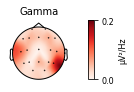

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s13-raw.fif...
    Range : 0 ... 283749 =      0.000 ...  1134.996 secs
Ready.
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
Not setting metadata
Not setting metadata
567 matching events found
No baseline correction applied
0 projection items activated
Loading data for 567 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


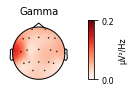

Opening raw data file /mnt/c/Users/anna-/Desktop/reconst_raw/s14-raw.fif...
    Range : 0 ... 542499 =      0.000 ...  2169.996 secs
Ready.
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
Not setting metadata
Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1085 events and 500 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


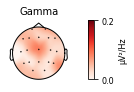

In [53]:
for file in files:
    data = read_raw_fif(file, preload=True)
    epochs = make_fixed_length_epochs(data, duration=2.0, preload=True)
    epochs.plot_psd_topomap(bands=[(30,45, "Gamma")], ch_type="eeg", normalize=True, dB=True, vlim=(0.0, 0.2));